<h2><b>Input : </b></h2>

*   train_microarray.csv
*   ab1_features.pkl
*   ab2_features.pkl
*   ab3_features.pkl

<h2><b>Output : </b></h2>

*   ab1_model.pkl
*   ab2_model.pkl
*   ab3_model.pkl

# Run All

## Import dan Load

Import library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import joblib

Mengatur Style

In [ ]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Load data train

In [ ]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1_r9KdY3hz2zVtCD6VZs2nHrnXBGbia8v')

Load hasil seleksi fitur

In [ ]:
ab1_features = joblib.load('ab1_features.pkl')
ab2_features = joblib.load('ab2_features.pkl')
ab3_features = joblib.load('ab3_features.pkl')

Df_train dengan fitur 1

In [ ]:
df_train1 = df_train[ab1_features]
df_train1.head()

,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,207730_x_at,216609_at,207953_at,217679_x_at,210168_at,...,206544_x_at,200598_s_at,212515_s_at,213872_at,202435_s_at,211505_s_at,40665_at,208654_s_at,202817_s_at,Label
0,2.672850,2.223647,2.894223,2.730180,2.708516,3.043026,2.318040,2.462324,2.748249,2.698125,...,2.584677,2.614547,2.459196,2.371555,1.859862,2.449663,2.464299,2.940958,2.116067,1.0
1,2.641439,2.350872,3.042087,2.856150,2.800348,3.129235,2.306733,2.476773,2.884853,2.293900,...,2.541014,2.464834,2.651054,2.249695,1.991560,2.262768,2.172416,2.875015,2.354635,0.0
2,2.510368,1.996011,2.624352,2.491994,2.648607,2.921754,2.231919,2.371051,2.482992,2.399431,...,2.408422,2.665663,2.371579,2.046329,2.353558,2.198965,2.246445,2.710852,1.743328,1.0
3,2.747069,2.666440,2.893101,2.998907,2.992614,3.307086,1.966337,2.863540,3.172937,2.521457,...,2.314931,2.019661,2.192755,2.209179,1.973821,1.916729,1.719003,2.110986,1.904847,1.0
4,2.785209,2.600757,3.116527,2.977250,2.859183,3.216666,2.424350,2.650209,2.929251,2.155440,...,2.305571,2.192273,2.404168,2.183277,2.610495,1.939796,1.736053,2.456737,1.935020,0.0


Df_train dengan fitur 2

In [ ]:
df_train2 = df_train[ab2_features]
df_train2.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,216609_at,...,208671_at,211505_s_at,40665_at,214830_at,208654_s_at,202131_s_at,202817_s_at,34031_i_at,201339_s_at,Label
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.318040,...,2.547195,2.449663,2.464299,2.316326,2.940958,2.170559,2.116067,2.136241,2.794302,1.0
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.306733,...,2.535646,2.262768,2.172416,2.248017,2.875015,2.089126,2.354635,2.106757,2.788661,0.0
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.231919,...,2.634353,2.198965,2.246445,2.327131,2.710852,1.971494,1.743328,2.098736,2.921265,1.0
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,1.966337,...,1.876583,1.916729,1.719003,1.774782,2.110986,1.840146,1.904847,1.471070,1.703865,1.0
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.424350,...,2.242884,1.939796,1.736053,2.100648,2.456737,2.037821,1.935020,1.968626,2.395988,0.0


Df_train dengan fitur 3

In [ ]:
df_train3 = df_train[ab3_features]
df_train3.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,216609_at,...,208654_s_at,202131_s_at,202817_s_at,201123_s_at,218002_s_at,211985_s_at,200751_s_at,34031_i_at,201339_s_at,Label
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.318040,...,2.940958,2.170559,2.116067,2.485884,2.414447,3.069618,2.456802,2.136241,2.794302,1.0
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.306733,...,2.875015,2.089126,2.354635,2.642448,2.533421,2.999199,2.582642,2.106757,2.788661,0.0
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.231919,...,2.710852,1.971494,1.743328,2.171087,2.153860,2.891588,2.406262,2.098736,2.921265,1.0
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,1.966337,...,2.110986,1.840146,1.904847,2.203658,2.326658,1.982301,1.346213,1.471070,1.703865,1.0
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.424350,...,2.456737,2.037821,1.935020,2.410492,3.039731,2.723537,2.164480,1.968626,2.395988,0.0


## X_train dan y_train

In [ ]:
X1_train = df_train1.iloc[:,:-1]
X1_train.head()

,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,207730_x_at,216609_at,207953_at,217679_x_at,210168_at,...,208750_s_at,206544_x_at,200598_s_at,212515_s_at,213872_at,202435_s_at,211505_s_at,40665_at,208654_s_at,202817_s_at
0,2.672850,2.223647,2.894223,2.730180,2.708516,3.043026,2.318040,2.462324,2.748249,2.698125,...,2.621121,2.584677,2.614547,2.459196,2.371555,1.859862,2.449663,2.464299,2.940958,2.116067
1,2.641439,2.350872,3.042087,2.856150,2.800348,3.129235,2.306733,2.476773,2.884853,2.293900,...,2.720216,2.541014,2.464834,2.651054,2.249695,1.991560,2.262768,2.172416,2.875015,2.354635
2,2.510368,1.996011,2.624352,2.491994,2.648607,2.921754,2.231919,2.371051,2.482992,2.399431,...,2.426039,2.408422,2.665663,2.371579,2.046329,2.353558,2.198965,2.246445,2.710852,1.743328
3,2.747069,2.666440,2.893101,2.998907,2.992614,3.307086,1.966337,2.863540,3.172937,2.521457,...,2.179337,2.314931,2.019661,2.192755,2.209179,1.973821,1.916729,1.719003,2.110986,1.904847
4,2.785209,2.600757,3.116527,2.977250,2.859183,3.216666,2.424350,2.650209,2.929251,2.155440,...,2.357678,2.305571,2.192273,2.404168,2.183277,2.610495,1.939796,1.736053,2.456737,1.935020


In [ ]:
y1_train = df_train1.iloc[:,-1]
y1_train.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Label, dtype: float64

In [ ]:
X2_train = df_train2.iloc[:,:-1]
X2_train.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,216609_at,...,205749_at,208671_at,211505_s_at,40665_at,214830_at,208654_s_at,202131_s_at,202817_s_at,34031_i_at,201339_s_at
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.318040,...,2.383935,2.547195,2.449663,2.464299,2.316326,2.940958,2.170559,2.116067,2.136241,2.794302
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.306733,...,2.435408,2.535646,2.262768,2.172416,2.248017,2.875015,2.089126,2.354635,2.106757,2.788661
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.231919,...,2.524147,2.634353,2.198965,2.246445,2.327131,2.710852,1.971494,1.743328,2.098736,2.921265
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,1.966337,...,2.558272,1.876583,1.916729,1.719003,1.774782,2.110986,1.840146,1.904847,1.471070,1.703865
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.424350,...,3.102548,2.242884,1.939796,1.736053,2.100648,2.456737,2.037821,1.935020,1.968626,2.395988


In [ ]:
y2_train = df_train2.iloc[:,-1]
y2_train.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Label, dtype: float64

In [ ]:
X3_train = df_train3.iloc[:,:-1]
X3_train.head()

,211612_s_at,219678_x_at,217653_x_at,211996_s_at,214594_x_at,218155_x_at,202936_s_at,207730_x_at,205401_at,216609_at,...,214830_at,208654_s_at,202131_s_at,202817_s_at,201123_s_at,218002_s_at,211985_s_at,200751_s_at,34031_i_at,201339_s_at
0,2.433180,2.672850,2.223647,2.894223,2.730180,2.708516,2.677585,3.043026,2.277064,2.318040,...,2.316326,2.940958,2.170559,2.116067,2.485884,2.414447,3.069618,2.456802,2.136241,2.794302
1,2.261091,2.641439,2.350872,3.042087,2.856150,2.800348,2.392170,3.129235,2.249331,2.306733,...,2.248017,2.875015,2.089126,2.354635,2.642448,2.533421,2.999199,2.582642,2.106757,2.788661
2,2.385914,2.510368,1.996011,2.624352,2.491994,2.648607,2.355828,2.921754,2.316953,2.231919,...,2.327131,2.710852,1.971494,1.743328,2.171087,2.153860,2.891588,2.406262,2.098736,2.921265
3,2.262845,2.747069,2.666440,2.893101,2.998907,2.992614,2.352489,3.307086,2.165011,1.966337,...,1.774782,2.110986,1.840146,1.904847,2.203658,2.326658,1.982301,1.346213,1.471070,1.703865
4,2.239799,2.785209,2.600757,3.116527,2.977250,2.859183,2.296027,3.216666,2.221606,2.424350,...,2.100648,2.456737,2.037821,1.935020,2.410492,3.039731,2.723537,2.164480,1.968626,2.395988


In [ ]:
y3_train = df_train3.iloc[:,-1]
y3_train.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Label, dtype: float64

## Model tanpa Tuning

AB1

In [ ]:
ab1_non_tuning = AdaBoostClassifier()
ab1_non_tuning_acc = cross_val_score(ab1_non_tuning, X1_train, y1_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab1_non_tuning_acc)
print("Rata-rata = ", ab1_non_tuning_acc.mean())

Akurasi masing-masing =  [0.61538462 0.61538462 0.76923077 0.84615385 0.76923077 0.76923077
 0.84615385 0.76923077 0.61538462 0.76923077]
Rata-rata =  0.7384615384615384


AB2

In [ ]:
ab2_non_tuning = AdaBoostClassifier()
ab2_non_tuning_acc = cross_val_score(ab2_non_tuning, X2_train, y2_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab2_non_tuning_acc)
print("Rata-rata = ", ab2_non_tuning_acc.mean())

Akurasi masing-masing =  [0.84615385 0.69230769 0.61538462 0.84615385 0.76923077 0.69230769
 0.84615385 0.84615385 0.69230769 0.76923077]
Rata-rata =  0.7615384615384616


AB3

In [ ]:
ab3_non_tuning = AdaBoostClassifier()
ab3_non_tuning_acc = cross_val_score(ab3_non_tuning, X3_train, y3_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab3_non_tuning_acc)
print("Rata-rata = ", ab3_non_tuning_acc.mean())

Akurasi masing-masing =  [0.61538462 0.76923077 0.92307692 0.92307692 0.84615385 0.61538462
 0.76923077 0.84615385 0.61538462 0.76923077]
Rata-rata =  0.7692307692307693


## Hyperparameter Tuning

### Parameter yang akan dituning

Definisi Parameter

In [ ]:
parameters_ab = {
        'n_estimators' : [50, 100, 150, 200],
        'learning_rate' : [0.01, 0.1, 1]  
        }

### AB1

In [ ]:
ab1_tuning = AdaBoostClassifier()

Gridsearch (sekitar 3 menit running)

In [ ]:
search_ab1 = GridSearchCV(ab1_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 10,
                        verbose=3)
search_ab1.fit(X1_train, y1_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.2s
[CV 2/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.2s
[CV 3/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.2s
[CV 4/10] END learning_rate=0.01, n_estimators=50;, score=0.846 total time=   0.2s
[CV 5/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.2s
[CV 6/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.2s
[CV 7/10] END learning_rate=0.01, n_estimators=50;, score=0.462 total time=   0.2s
[CV 8/10] END learning_rate=0.01, n_estimators=50;, score=0.846 total time=   0.2s
[CV 9/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.2s
[CV 10/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.2s
[CV 1/10] END learning_rate=0.01, n_estimators=100;, score=0.538 total time=   0.5s
[CV 2/10] END learning

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

Akurasi dan parameter terbaik pada Gridsearch

In [ ]:
ab1_best_acc_score = search_ab1.best_score_
ab1_best_parameter = search_ab1.best_params_
print("Akurasi terbaik = ", ab1_best_acc_score)
print("Parameter terbaik = ", ab1_best_parameter)

Akurasi terbaik =  0.7923076923076924
Parameter terbaik =  {'learning_rate': 1, 'n_estimators': 150}


Membuat model dengan parameter terbaik

In [ ]:
learning_rate = ab1_best_parameter["learning_rate"]
n_estimators = ab1_best_parameter["n_estimators"]

ab1_tuning = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

Cross val akhir

In [ ]:
ab1_tuning_acc = cross_val_score(ab1_tuning, X1_train, y1_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab1_tuning_acc)
print("Rata-rata = ", ab1_tuning_acc.mean())

Akurasi masing-masing =  [0.69230769 0.76923077 0.84615385 0.84615385 0.84615385 0.76923077
 0.76923077 0.92307692 0.69230769 0.76923077]
Rata-rata =  0.7923076923076924


### AB2

In [ ]:
ab2_tuning = AdaBoostClassifier()

Gridsearch (sekitar 3 menit running)

In [ ]:
search_ab2 = GridSearchCV(ab2_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 10,
                        verbose=3)
search_ab2.fit(X2_train, y2_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.4s
[CV 2/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.4s
[CV 3/10] END learning_rate=0.01, n_estimators=50;, score=0.462 total time=   0.4s
[CV 4/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.4s
[CV 5/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.4s
[CV 6/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.4s
[CV 7/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.4s
[CV 8/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.4s
[CV 9/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.4s
[CV 10/10] END learning_rate=0.01, n_estimators=50;, score=1.000 total time=   0.4s
[CV 1/10] END learning_rate=0.01, n_estimators=100;, score=0.615 total time=   0.7s
[CV 2/10] END learning

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

Akurasi dan parameter terbaik pada Gridsearh

In [ ]:
ab2_best_acc_score = search_ab2.best_score_
ab2_best_parameter = search_ab2.best_params_
print("Akurasi terbaik = ", ab2_best_acc_score)
print("Parameter terbaik = ", ab2_best_parameter)

Akurasi terbaik =  0.7769230769230769
Parameter terbaik =  {'learning_rate': 0.1, 'n_estimators': 150}


Membuat model dengan parameter terbaik

In [ ]:
learning_rate = ab2_best_parameter["learning_rate"]
n_estimators = ab2_best_parameter["n_estimators"]

ab2_tuning = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

Cross val akhir

In [ ]:
ab2_tuning_acc = cross_val_score(ab2_tuning, X2_train, y2_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab2_tuning_acc)
print("Rata-rata = ", ab2_tuning_acc.mean())

Akurasi masing-masing =  [0.69230769 0.69230769 0.61538462 0.84615385 0.84615385 0.76923077
 0.84615385 0.92307692 0.69230769 0.84615385]
Rata-rata =  0.7769230769230769


### AB3

In [ ]:
ab3_tuning = AdaBoostClassifier()

Gridsearch (sekitar 3 menit running)

In [ ]:
search_ab3 = GridSearchCV(ab3_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 10,
                        verbose=3)
search_ab3.fit(X3_train, y3_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END learning_rate=0.01, n_estimators=50;, score=0.615 total time=   0.4s
[CV 2/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.4s
[CV 3/10] END learning_rate=0.01, n_estimators=50;, score=0.462 total time=   0.4s
[CV 4/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.4s
[CV 5/10] END learning_rate=0.01, n_estimators=50;, score=0.692 total time=   0.4s
[CV 6/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.4s
[CV 7/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.4s
[CV 8/10] END learning_rate=0.01, n_estimators=50;, score=0.769 total time=   0.4s
[CV 9/10] END learning_rate=0.01, n_estimators=50;, score=0.538 total time=   0.4s
[CV 10/10] END learning_rate=0.01, n_estimators=50;, score=1.000 total time=   0.4s
[CV 1/10] END learning_rate=0.01, n_estimators=100;, score=0.538 total time=   0.8s
[CV 2/10] END learning

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

Akurasi dan parameter terbaik pada Gridsearch

In [ ]:
ab3_best_acc_score = search_ab3.best_score_
ab3_best_parameter = search_ab3.best_params_
print("Akurasi terbaik = ", ab3_best_acc_score)
print("Parameter terbaik = ", ab3_best_parameter)

Akurasi terbaik =  0.7923076923076924
Parameter terbaik =  {'learning_rate': 1, 'n_estimators': 150}


Membuat model dengan parameter terbaik

In [ ]:
learning_rate = ab3_best_parameter["learning_rate"]
n_estimators = ab3_best_parameter["n_estimators"]

ab3_tuning = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators)

Cross val score

In [ ]:
ab3_tuning_acc = cross_val_score(ab3_tuning, X3_train, y3_train, scoring="accuracy", cv=10)
print("Akurasi masing-masing = ", ab3_tuning_acc)
print("Rata-rata = ", ab3_tuning_acc.mean())

Akurasi masing-masing =  [0.76923077 0.69230769 0.84615385 0.84615385 0.84615385 0.61538462
 0.84615385 0.84615385 0.76923077 0.84615385]
Rata-rata =  0.7923076923076924


## Non Tuning vs Tuning

Melihat model yang dipilih

In [ ]:
model_yang_dipilih = ""

if (ab1_tuning_acc.mean() > ab1_non_tuning_acc.mean()):
  ab1_model = ab1_tuning
  model_yang_dipilih += "AB1 Tuning, "
else:
  ab1_model = ab1_non_tuning
  model_yang_dipilih += "AB1 Non Tuning, "

if (ab2_tuning_acc.mean() > ab2_non_tuning_acc.mean()):
  ab2_model = ab2_tuning
  model_yang_dipilih += "AB2 Tuning, "
else:
  ab2_model = ab2_non_tuning
  model_yang_dipilih += "AB2 Non Tuning, "

if (ab3_tuning_acc.mean() > ab3_non_tuning_acc.mean()):
  ab3_model = ab3_tuning
  model_yang_dipilih += "AB3 Tuning"
else:
  ab3_model = ab3_non_tuning
  model_yang_dipilih += "AB3 Non Tuning"

print("Model yang dipilih = ", model_yang_dipilih)

Model yang dipilih =  AB1 Tuning, AB2 Tuning, AB3 Tuning


Visualisasi perbandingan tuning vs non-tuning

In [ ]:
def addlabels(x,y,z):
    for i in range(len(x)):
      plt.text(i, x[i]+0.02, format(x[i], ".3f"), ha = 'center')
      plt.text(i+0.25, y[i]+0.02, format(y[i], ".3f"), ha = 'center')
      plt.text(i+0.5, z[i]+0.02, format(z[i], ".3f"), ha = 'center')

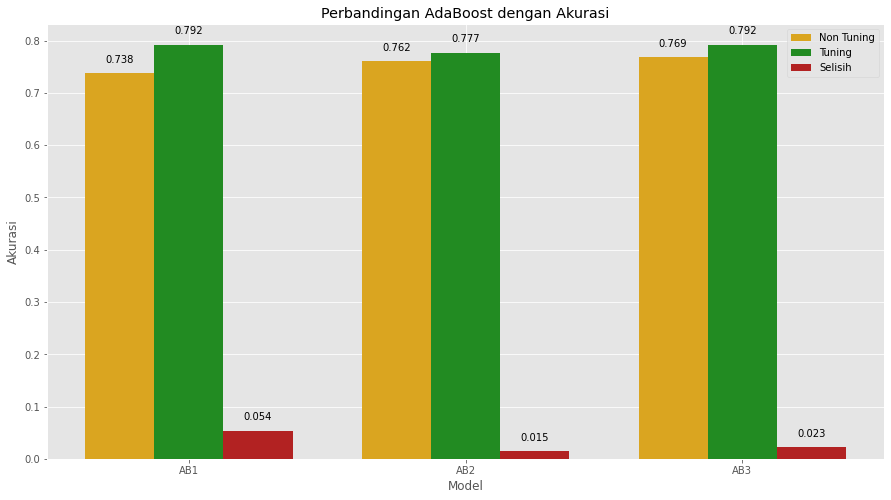

In [ ]:
N = 3
ind = np.arange(N) 
width = 0.25
  
non_tuning_acc = [ab1_non_tuning_acc.mean(),  ab2_non_tuning_acc.mean(),  ab3_non_tuning_acc.mean()]
bar1 = plt.bar(ind, non_tuning_acc, width, color='goldenrod')
  
tuning_acc = [ab1_tuning_acc.mean(),  ab2_tuning_acc.mean(),  ab3_tuning_acc.mean()]
bar2 = plt.bar(ind+width, tuning_acc, width, color='forestgreen')

selisih = []
for i in range(0, len(non_tuning_acc)):
  selisih.append(np.abs(non_tuning_acc[i]-tuning_acc[i]))

bar3 = plt.bar(ind+width*2, selisih, width, color = 'firebrick')

addlabels(non_tuning_acc, tuning_acc, selisih)
plt.xlabel("Model")
plt.ylabel('Akurasi')
plt.title("Perbandingan AdaBoost dengan Akurasi")
  
plt.xticks(ind+width,['AB1', 'AB2', 'AB3'])
plt.legend( (bar1, bar2, bar3), ('Non Tuning', 'Tuning', 'Selisih') )
plt.show()

## Export

Export model

In [ ]:
joblib.dump(ab1_model, 'ab1_model.pkl')
joblib.dump(ab2_model, 'ab2_model.pkl')
joblib.dump(ab3_model, 'ab3_model.pkl')

['ab3_model.pkl']